## Chapter 2: Drawing with 2D Vectors

### Vectors

This is a vector:

![vector image](vector.gif)

A vector **has magnitude** (size) and **direction**:

![vector image](vector-mag-dir.svg)



### 2.1 Picturing 2D Vectors

In [29]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *
from vectors import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Note - IPython extension to reload modules before executing user code.  	`autoreload`- reloads modules automatically before entering the execution of code typed at the IPython prompt.  [more](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html)

We can now draw the points outlining the dinosaur:

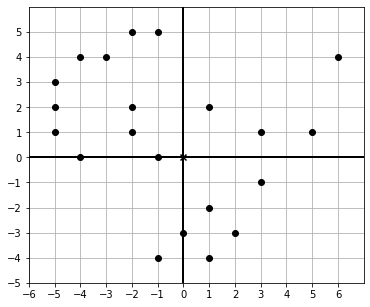

In [3]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(
    Points(*dino_vectors)
)

### Remember the Star operator in Python

In the context of a single asterisk as used in a function declaration, this allows variable number of arguments passed from calling environment. Inside the function it behaves as a [tuples](https://docs.python.org/3/library/stdtypes.html#tuple).

for example:

`>>> def function(*arg):
    print (type(arg))
    for i in arg:
      print (i)`
      
 `>>> function(1,2,3)
<class 'tuple'>
1
2
3`

As a next step in our drawing process, we can connect some dots.  A first segement might connect the point (6, 4) with the point (3,1) on the dinosaur's tail.  We can draw the points along with this new segement using the function call, and show the results:

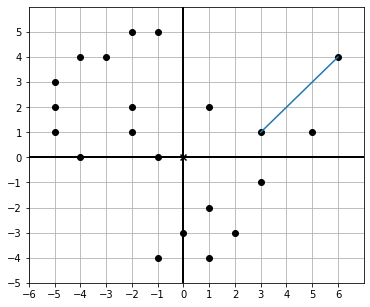

In [4]:
draw(
    Points(*dino_vectors),
    Segment((6,4),(3,1))
)

**EXERCISE**: Draw the dinosaur with the dots connected by constructing a `Polygon` object with the `dino_vectors` as its vertices.

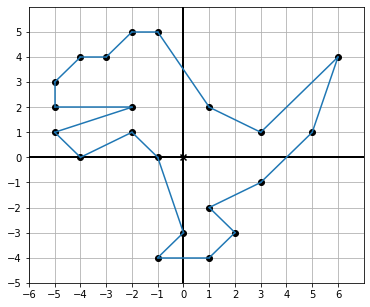

In [5]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

**EXERCISE** Draw the vectors `[(x,x**2) for x in range(-10,11)]` as points (dots) using the draw function. What is the result?

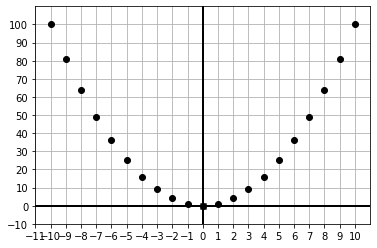

In [6]:
draw(
    Points(*[(x,x**2) for x in range(-10,11)]),
    grid=(1,10),
    nice_aspect_ratio=False # don't require x scale to match y scale
)

### Plane Vector arithmetic

Like numbers, vectors have their own kind of arithmetic; we can combine vectors with operations to make new vectors.  The difference with vectors is that we can visualize the results.  Operations from vector arithmetic all accomplish useful geometric transformations, not just algebraic ones.  **Vector Addition** - Given two input vectors, you **add their x-coordinates** to get the resulting x-coordinate and then you **add their y-coordinates** to get the resulting y-coordinate.  Creating a new vector with these summed coordinates gives you the *vector sum* of the original vectors. 

![vector add image](vector-add3.gif)

>The vector (8, 13) and the vector (26, 7) add up to the vector (34, 20)


We now have enough information to create initial function, which would look like this:

In [7]:
def add(v1,v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

Because we can interpert vectors as arrows or as points in the plane, we can visualize the result of the addition in both ways.  As a point in the plane, you can reach (-1, 1) 

beacuse:
> (3, 4) - (4, 3) = (-1, 1)

by starting at the origin, which is (0, 0), and move one unit to the left and one unit up.  You reach the vector sum of (4, 3) + (-1, 1) by starting instead at (4, 3) and moving one unit to the left and one unit up.  This is the same as saying you reaverse one arrow and then traverse the second.

The rule of vector addition of arrows is sometimes clled *tip-to-tail* addition.  That's because if you move the tail of the second arrow to the tip of the first (without changing its length or direction!), then the sum is the arrow from the start of the first to the end of the second.  When we talk about arrows, we really mean *a specific distance in a spefific direction*.  Adding a vector has the effect of moving or *translating* an existing point or collection of points.

If we add the vector (-1.5, -2.5) to every vector of `dino_vectors`, we get a new list of vectors, each of which is 1.5 units left and 2.5 units down from one of the original vectors:

In [8]:
dino_vectors2 = [add((-1.5,-2.5), v) for v in dino_vectors]

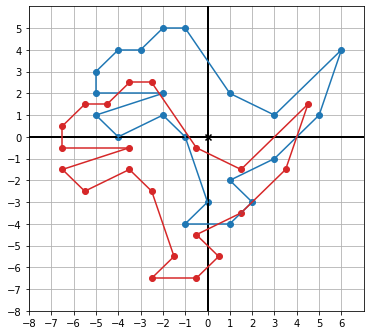

In [9]:
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
)

The arrows in the copy below show that each point moved down and to the left by the same vector:(-1.5, -2.5).  A translation like this is useful if, for instance, we want to make the dinosaur a moving character in a 2D computer game.  Depending on the button pressed by the user, the dinosaur could translate in th corresponding direction on the screen.

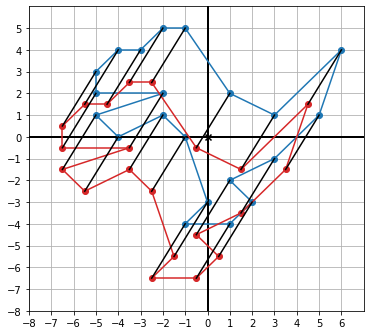

In [10]:
arrows = [Segment(tip,tail,color=black) for (tip,tail) in
         zip(dino_vectors2, dino_vectors)]
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red),
    *arrows
)

<a id='vector_components-and_length'></a>
### Vector components and lengths

Sometimes it's useful to take a vector we already have and decompose it as a sum of smaller vectors.  It can be useful to think of vectors as a sum of a vector pointing in the x direction and a vector pointing in the y direction.  As an example, consider the below vector ( 4, 3)  rewritten as the sum (4, 0) + (0, 3).  

>(4, 0) + (0, 3) = (4, 3)

Thinking of the vector (4, 3) as a navigation path in the plane, the sum (4, 0) + (0, 3) gets us to the same point along a different path.

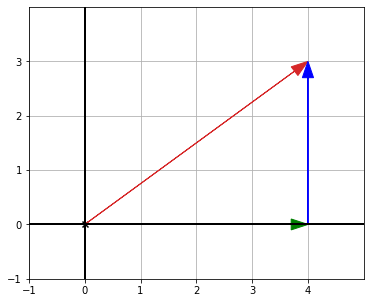

In [11]:
draw(
    Arrow((4, 3), (0, 0)),
    Arrow((4, 3), (4, 0), "blue"),
    Arrow((4, 0), (0, 0), "green")
)

The two vectors (4, 0) and (0, 3) are called the *x and y components*, respectively.  The length of a vecor is the length of the arrow that represents it, or equivalently, the distance from the origin to the point that represents it.

**Pythagorean Theorem** - You may recall that the relevant formula is the pythagorean theorem.  For a right triangle ( a triangle having two sided meeting at a 90 degree angle), the Pythagorean theorem says that the square of the length of the longest side is the sum of he squares of the lengths of the other two sides.  The longest side is called the hypotenuse, and its length is denoted by *c* in the memorable formula:

> a<sup>2</sup> + b<sup>2</sup> = c<sup>2</sup> 




where *a* and *b* are the lengths of the other two sides.  With a = 4 and b = 3, we can find *c* as the square root of:

>$\sqrt{(4)^2+(3)^2} = 5$

For help in entering math equations see: [Jupyter Notebook Examples](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/examples_index.html)

Breaking a vector into components is handy because it always gives us a right triangle.  If we know the lengths of the components, we can compute the length of the hypotenuse, which is the length of the vector.  Our answer of 5 is a special case where the distance truns ot to be an integer, but typically, lengths that come out of the pythagorean theorem are not whole numbers.

We can now translate this formuala into a working python function called length. this function will take a 2D vector and return its floating-point lenght:


`
def length(v):
    return sqrt(v[0]**2 + v[1]**2)
`


### Multiplying vectors by numbers

The operation of multiplying a vector by a number is called *scalar multiplication*.  When working with vectors, ordinary numbers are often called *scalars*.  It's also an appropriate term because the effect of this operation is *scaling* the target vector by the given factor.  

### Vector vs Scalar

A **scalar** has **magnitude** (size) **only**.
A **vector** has **magnitude and direction**, and is often written in **bold**, so we know it is not a scalar:
- so c is a vector, it has magnitude and direction
- but c is just a value, like 3 or 12.4

> Example: **kb** is actually the scalar k times the vector **b**.

The result on the vector componets is that each component is scaled by the same factor.  You can picture scalar multiplication as changing the size of the right triangle defined by a vector and its components, but not affecting its *aspect ratio* (a proportional relationship between an objects's width and height. Essentially, it describes an image's shape).

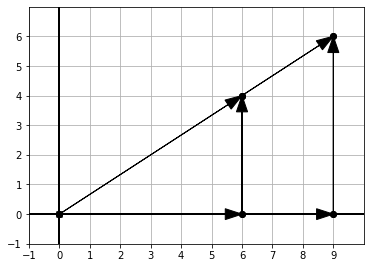

In [12]:
grid_points = [
    (6, 4), (0, 0),
    (9, 6), (6, 4),
    (9, 6), (9, 0),
    (6, 4), (6, 0),
    (6, 0), (0, 0),
    (9, 0), (0, 0)
    
]

draw(
    Points(*grid_points),
    Arrow((6, 4), (0, 0), "black"),
    Arrow((9, 6), (6, 4), "black"),
    Arrow((9, 6), (9, 0), "black"),
    Arrow((6, 4), (6, 0), "black"),
    Arrow((6, 0), (0, 0), "black"),
    Arrow((9, 0), (0, 0), "black"),
)




In coordinates, the scalar multiple of 1.5 times he vector **v** = (6, 4) gives us a new vector (9, 6), where each component is 1.5 times its original value.  

> `1.5(6, 4) = (9, 6)`

Computationally, we execute any scalar multiplication on a vector by multiplying each coordinate of the vector by the scalar.

### Subtraction, displacement, and distance

Scalar multiplication agrees with our intution for multiplying numbers.  A whole number multiple of a number is the same as a repeated sum, and the same holds for vectors.  We can make a similar argument for negative vectors and vector subtraction.

Given a vector **v** the *opposite* vector, **- v**, is the same as the scalar multipe -1 * v.  (We've cover this in our maths notes).  If **v** is (-4, 3), its opposite, **- v** is (4, -3) as shown below:

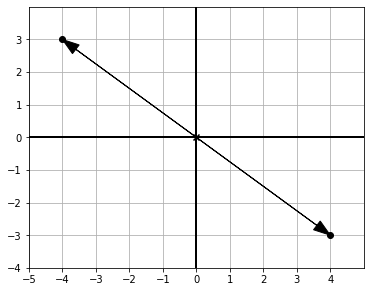

In [13]:
draw(
    Arrow((-4, 3), (0, 0), "black"),
    Arrow((4, -3), (0, 0), "black"),
    Points((-4, 3)),
    Points((4, -3)),
)

We get the above by multiplying each coordinate by -1, or in other words, changing the sign of each.

Having a notion of negating a vector, we can define *vector subtraction*.  For numbers, x-y is the same as x + (-y).  We set the same convention for vectors.  To subtract a vector **w** from a vector **v**, you add the vector **-w** to **v**.  Thinking of vectors **v** and **w** as points, **v-w** is the position of **v** relative to **w**.  Thinking instead of **v** and **w** as arrows begining at the origin, (see below) shows that **v-w** is the arrow from the tip of **w** to the tio of **v**.

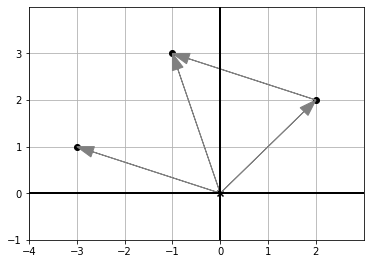

In [14]:
draw(
    Arrow((-3, 1), (0, 0), "gray"),
    Arrow((-1, 3), (0, 0), "gray"),
    Arrow((-1, 3), (2, 2), "gray"),
    Arrow((2, 2), (0, 0), "gray"),
    Points((-3, 1)),
    Points((-1, 3)),
    Points((2, 2))
)



| Label | Coordinate |
| ----------- | ----------- |
| v-w | (-3, 1) |
| v | (-1, 3) |
| w | (2, 2) |

The coordinates of **v-w** are th differences of the coordinates **v** and **w**.  
> `v = (-1, 3) and w = (2, 2) => (-1, 3) - (2, 2) = (-3, 1)`

Let's look at the difference of the vectors **v** = (-1, 3) and **w** = (2, 2) again.  You can use the `draw()` to plot the point **v** and **w** and to draw a segment between them.

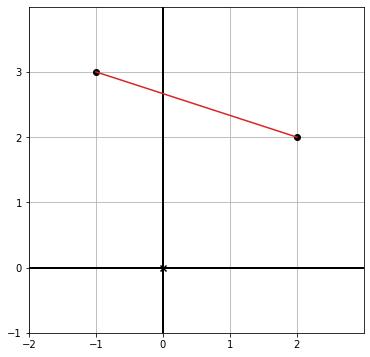

In [15]:
draw(
    Points((2,2), (-1,3)),
    Segment((2, 2), (-1, 3), color=red)
)

Don't be confused here.  This graph is just the segment from the previous graph.  It tells us that if we start at apoint *w*, we need to got three units left and one unit up to get to point *u*.  This follows the same calculation we got from the coordinates of **v-w** above:

> v = (-1, 3) and w = (2, 2) => <span style="color:blue;font-weight:bold">(-1, 3) - (2, 2) = (-3, 1) </span>.


This vector is sometimes called the *displacement* form **w** to **v**.  The straight, red line segment from **w** to **v** in the graph above shows the *distance* between the two points.  The length of the line is computed with Pythagorean theorem as follows:

 >$\sqrt{(-3)^2+(1)^2} = \sqrt{9 + 1} = \sqrt{10} = 3.162$
 
**While the displacment is a vector, the distance is a scalar ( a single number).**  The distance on it's own is not enough to specify how to get from **w** to **v**; there are plenty of points that have the same distance from **w**.  The graph below shows a few others with whole number coordinates.


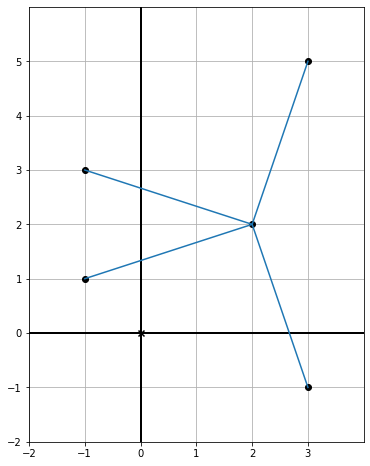

In [16]:
draw(
    Segment((2, 2), (-1, 1), color=blue),
    Segment((2, 2), (-1, 3), color=blue),
    Segment((2, 2), (3, 5), color=blue),
    Segment((2, 2), (3, -1), color=blue),
    Points((-1, 1)),
    Points((-1, 3)),
    Points((2, 2)),
    Points((3, 5)),
    Points((3, -1))
)

### Mini Project

You can add any number of vectors together by summing *all* of their *x*-coordinates and *all* of their *y*-coordinates.  For instace:

>(1,2) + (2,4) + (3,6) + (4,8)
>x -> 1 + 2 + 3 + 4 = 10
>y -> 2 _ 4 + 6 + 8 = 20

Making the result ( 10, 20).  We now have enough information to revise our add function that takes any number of vectors as arguments:


`def add(*vectors):
    return (sum([v[0] for v in vectors]), sum([v[1] for v in vectors]))`

### Mini Project

Write a function translate(translation, vectors) that takes a trnaslation vector and a list of input vectors, and returns a list of the input vectors all translated by the translation vector.  **Remember, Adding a vector has the effect of moving or *translating* an existing point or collection of points**.  For example, if we add the vector:
**(-1.5, -2.5)** to a vector collection, we get a newlist of vectors, each of which is 1.5 units left and 2.5 units down from one of the original vectors.  Back to our function, if for example we are given 

`((1,1), [(0,0), (0,1), (-3, -3)])`

We should return a list [(1, 1), (1,2), (-2, -2)]

`
def translate(translation, vectors):
    return [add(translation, v) for v in vectors]
`

We can test our new method below


In [17]:
translate((1,1), [(0,0), (0,1,), (-3,-3)])

[(1, 1), (1, 2), (-2, -2)]

###MINI-PROJECT: 

Write a Python function using vector addition to show 100 simultaneous and non-overlapping copies of the dinosaur. This shows the power of computer graphics: imagine how tedious it would be to specify all 2,100 coordinate pairs by hand!

### Solution:
With some trial and error, you can translate the dinosaurs in the vertical and the horizontal direction so that they don't overlap, and set the boundaries appropriately.  The grid line, axes, origin, and points were left out to make the drawing clearer.

In [18]:
def hundred_dinos():
    translations = [(12*x,10*y) 
                    for x in range(-5,5) 
                    for y in range(-5,5)]
    dinos = [Polygon(*translate(t, dino_vectors),color=blue)
                for t in translations]
    draw(*dinos, grid=None, axes=None, origin=None)
    

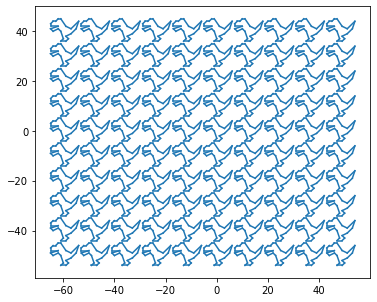

In [19]:
hundred_dinos()

### Excercise

Which is longer, the *x* of the *y* component of (3, -2) + (1, 1) + (-2, -2)?

### Solution

(x) = 3 + 1 -2 = 2
(y) = -2 + 1 -2 = -3
(2, -3)

thus, y is longer.

### Excercise

What are the *components* and lengths of the vectors (-6, -6) and (5, -12)?

Remember, In a two-dimensional coordinate system, any vector can be broken into **x -component** and **y -component**.

> $$ \vec{v}=(V_x, V_y) $$

Solution -  The component of (-6, -6) are (-6, 0) and (0, -6), both having length of 6.  The length of (-6, -6) is the square root of $\sqrt{(6)^2 + (6)^2} \approx 8.485 $


### Excercise

What vector in the dino_vectors list has the longest length? Use the Python length function to compute the answer quickly.  The `max()` function returns the largest of the input values.

Its syntax is as follows:

`max(iterable[, default=obj, key=func]) -> value`

Note the use of the opitonal `key` parameter - It refers to the single argument function to customize the sort order. The function is applied to each item on the iterable.  We use are earlier defined function `length()` [see](#vector_components-and_length).

Solution:


In [20]:
>>> max(dino_vectors, key=length)
(6, 4)

(6, 4)

### Excercise

Suppose a vector **w** has the coordinates ($\sqrt{(2)}$, $\sqrt{(3)}$).  What are the approximate coordinates of the scalar multiple $\pi$ * **w**?  Draw an approximation of the original vector and the new vector.

**Solution** - $\sqrt{(2)} \approx 1.414214$, $\sqrt{(3)} \approx 1.732051$

Scaling each coordinate by a factor of $\pi$, we get

(4.442883, 5.441398)

The scaled vector is longer than the original as shown below:


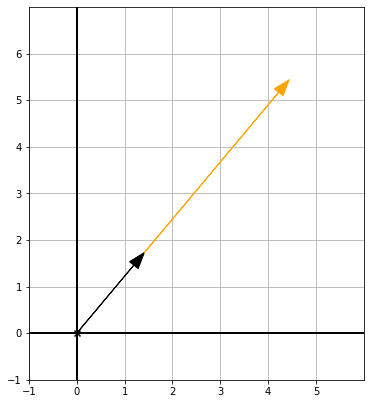

In [42]:
from math import sqrt, pi

draw(
    Arrow((sqrt(2), sqrt(3)), (0, 0), "black"),
    Arrow((sqrt(2)*pi, sqrt(3)*pi), (sqrt(2), sqrt(3)), "orange"),
)

Note in the above the original(black) is shorter, while the scaled version is longer

Excercise - **Define a scale function**:


In [44]:
def scale(scalar, v):
    return(v[0]*scalar, v[1]*scalar)